In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


/home/alireza/anaconda3/envs/adaexam/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
def create_string_list(sparsity_levels, num_experiments, exp_name, arch_name, model_name= "Bert-base"):
    string_list = []
    for n in range(num_experiments+1):
        for sparsity in sparsity_levels:
            string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n}")
    return string_list

def create_MHA_string_list(sparsity_levels, num_experiments, exp_name, arch_name, model_name= "Bert-base-MHA"):
    string_list = []
    for n in range(num_experiments+1):
        for sparsity in sparsity_levels:
            for head in range(4):
                string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H{head} QKV")
                string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H{head} Transpose")
                string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H{head} QKT")
                string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H{head} Softmax")
                string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H{head} QKTV")
                string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H{head} Post-softmax")
            string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H-1 MHA")
            string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H-1 Condense")
            string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H-1 Add/Norm")
    return string_list

In [3]:

filenames = {"./stats/1May_8x8/stats_abw.txt":
                 create_string_list([0, 10, 20, 30], 5, "BWMA", "SA8x8"),
             "./stats/1May_8x8/stats_abw2.txt":
                 create_string_list([40, 50, 60, 70, 80, 90], 5, "BWMA","SA8x8"),
             "./stats/1May_8x8/stats_ticsat.txt":
                create_string_list([0, 10, 20, 30], 4, "RWMA","SA8x8"),
             "./stats/1May_8x8/stats_ticsat2.txt":
                create_string_list([40, 50, 60, 70, 80, 90], 4, "RWMA","SA8x8"),
             "././stats/27apr_16x16/stats_abw.txt":
                 create_string_list([0, 10, 20, 30], 5, "BWMA", "SA16x16"),
             "././stats/27apr_16x16/stats_abw2.txt":
                 create_string_list([40, 50, 60, 70, 80, 90], 5, "BWMA", "SA16x16"),
             "././stats/27apr_16x16/stats_ticsat.txt":
                create_string_list([0, 10, 20, 30], 5, "RWMA", "SA16x16"),
             "././stats/27apr_16x16/stats_ticsat2.txt":
                create_string_list([40, 50, 60, 70, 80, 90], 5, "RWMA", "SA16x16"),

             "./stats/4May_SIMD/stats_simd_abw.txt":
                create_string_list([0, 10, 20, 30], 3, "BWMA", "SIMD"),
             "./stats/4May_SIMD/stats_simd_abw2.txt":
                create_string_list([40, 50, 60, 70, 80, 90], 3, "BWMA", "SIMD"),
             "./stats/4May_SIMD/stats_simd.txt":
                 create_string_list([0, 10, 20, 30], 3, "RWMA", "SIMD"),
             "./stats/4May_SIMD/stats_simd2.txt":
                 create_string_list([40, 50, 60, 70, 80, 90], 3, "RWMA", "SIMD"),

             "./stats/8May_ZF/stats_vit_abw.txt":
                 create_string_list([30, 60, 90], 1, "BWMA", "SA16x16", model_name="ViT-B32"),
             "./stats/8May_ZF/stats_vit_zf.txt":
                 create_string_list([30, 60, 90], 1, "ZF", "SA16x16", model_name="ViT-B32"),
             "./stats/8May_ZF/stats_bert_zf.txt":
                 create_string_list([30, 60, 90], 1, "ZF", "SA16x16", model_name="Bert-base"),
             "./stats/8May_ZF/stats_gpt3_abw.txt":
                 create_string_list([30, 60, 90], 1, "BWMA", "SA16x16", model_name="GPT-3"),
             "./stats/8May_ZF/stats_gpt3_zf.txt":
                 create_string_list([30, 60, 90], 1, "ZF", "SA16x16", model_name="GPT-3"),
             # "./stats/12Dec_hidden_key/stats_bp_zf.txt":
             #     create_string_list([30, 60, 90], 1, "ZF", "SA16x16", model_name="ViT-B32"),
             "./stats/12Dec_hidden_key/stats_bp_hk.txt":
                 create_string_list([30, 60, 90], 1, "Hidden", "SA16x16", model_name="ViT-B32"),
            "./stats/19May_no_pruning/stats_no_pruning_vitB.txt":
            create_string_list([0], 5, "No-pruning", "SA16x16", model_name="ViT-B32"),
             "./stats/19May_no_pruning/stats_no_pruning_gpt3.txt":
            create_string_list([0], 2, "No-pruning", "SA16x16", model_name="GPT-3"),
             "./stats/19May_no_pruning/stats_no_pruning_bert.txt":
            create_string_list([0], 4, "No-pruning", "SA16x16", model_name="Bert-base"),

            "./stats/10May_MHA/stats_mha_rw.txt":
                create_MHA_string_list([0], 1, "RWMA", "SA16x16"),
             "./stats/10May_MHA/stats_mha_bw.txt":
                create_MHA_string_list([0], 1, "BWMA", "SA16x16"),
             "./stats/10May_MHA/stats_mha_rw_s.txt":
                create_MHA_string_list([50], 1, "RWMA", "SA16x16"),
             "./stats/10May_MHA/stats_mha_bw_s_1.txt":
                create_MHA_string_list([50], 1, "BWMA", "SA16x16"),

             "./stats/14Nov_multicore23/stats_bwma_single.txt":
             create_string_list([0], 1, "BWMA", "SA16x16_signle_core"),
             "./stats/14Nov_multicore23/stats_rwma_single.txt":
             create_string_list([0], 1, "RWMA", "SA16x16_signle_core"),
                "./stats/14Nov_multicore23/stats_bwma_dual.txt":
             create_string_list([0], 1, "BWMA", "SA16x16_dual_core"),
            "./stats/14Nov_multicore23/stats_rwma_dual.txt":
             create_string_list([0], 1, "RWMA", "SA16x16_dual_core"),
             "./stats/14Nov_multicore23/stats_bwma_quad.txt":
             create_string_list([0], 1, "BWMA", "SA16x16_quad_core"),
            "./stats/14Nov_multicore23/stats_rwma_quad.txt":
             create_string_list([0], 1, "RWMA", "SA16x16_quad_core")

             }


feature_name = ['sim_seconds',
                'sim_ticks',
                'system.mem_ctrls.num_reads::total',
                'system.mem_ctrls.num_writes::total',
                'system.cpu.dcache.overall_hits::total',
                'system.cpu.dcache.overall_misses::total',
                'system.cpu.dcache.overall_accesses::total',
                'system.cpu.dcache.overall_miss_rate::total',
                'system.cpu.icache.overall_hits::total',
                'system.cpu.icache.overall_misses::total',
                'system.cpu.icache.overall_accesses::total',
                'system.cpu.icache.overall_miss_rate::total',
                'system.l2.overall_hits::total',
                'system.l2.overall_misses::total',
                'system.l2.overall_accesses::total',
                'system.l2.overall_miss_rate::total',
                'system.switch_cpus.idleCycles',
                'system.switch_cpus.op_class_0::IntAlu',
                'system.switch_cpus.op_class_0::IntMult',
                'system.switch_cpus.op_class_0::IntDiv',
                'system.switch_cpus.op_class_0::MemRead',
                'system.switch_cpus.op_class_0::MemWrite',
                'system.switch_cpus.op_class_0::CusAluProcess',
                'system.switch_cpus.op_class_0::CusAluParamWrite',
                'system.switch_cpus.op_class_0::CusAluQueue',
                'system.cpu.idleCycles',
                'system.cpu.op_class_0::IntAlu',
                'system.cpu.op_class_0::IntMult',
                'system.cpu.op_class_0::IntDiv',
                'system.cpu.op_class_0::MemRead',
                'system.cpu.op_class_0::MemWrite',
                'system.cpu.op_class_0::CusAluProcess',
                'system.cpu.op_class_0::CusAluParamWrite',
                'system.cpu.op_class_0::CusAluQueue',
                'system.l2.overall_miss_latency::total',
                'system.cpu.icache.overall_miss_latency::total',
                'system.cpu.dcache.overall_miss_latency::total',
                'system.l2.overall_misses::total',
                'system.cpu.dcache.overall_misses::total',
                'system.cpu.icache.overall_misses::total',

                'system.cpu0.dcache.overall_misses::total',
                'system.cpu0.icache.overall_misses::total',
                'system.cpu0.dcache.overall_accesses::total',
                'system.cpu0.icache.overall_accesses::total',
                'system.cpu1.dcache.overall_misses::total',
                'system.cpu1.icache.overall_misses::total',
                'system.cpu1.dcache.overall_accesses::total',
                'system.cpu1.icache.overall_accesses::total',
                'system.cpu2.dcache.overall_misses::total',
                'system.cpu2.icache.overall_misses::total',
                'system.cpu2.dcache.overall_accesses::total',
                'system.cpu2.icache.overall_accesses::total',
                'system.cpu3.dcache.overall_misses::total',
                'system.cpu3.icache.overall_misses::total',
                'system.cpu3.dcache.overall_accesses::total',
                'system.cpu3.icache.overall_accesses::total',

                ]

MHA_layers = ["Query", "Key", "Value", "Transpose", "QKT", "Pre-Softmax", "Score", "Post-Softmax"]
# layers = ["{}{}".format(l, i) for i in range(1,17) for l in MHA_layers ]
# layers += ["Nan", "Projection", "Add/Norm0", "FF0", "FF1", "Add/Norm1"]


In [4]:
df = pd.DataFrame()

for filename in filenames.keys():
    layers = [""] if "MHA" in filename else(["MHA", "Projection", "Add/Norm","FF"] if "no_pruning" in filename else ["MHA", "FF"])
    exp_list = []
    with open(filename, 'r') as kernel_file:
        lines = kernel_file.readlines()
        exp_index = 0
        for line in lines:
            if line.startswith('---------- Begin Simulation Statistics'):
                experiment = {'model': filenames[filename][exp_index // len(layers)],
                              'layer': layers[exp_index % len(layers)]}
            else:
                for k in feature_name:
                    if line.startswith(k):
                        l = line.split(k)[1]
                        l = l.split()[0]
                        experiment[k] = np.float64(l)
            if line.startswith('---------- End Simulation Statistics'):
                exp_list.append(experiment)
                exp_index += 1

                if exp_index >= len(layers) * len(filenames[filename]):
                    break

    df_kernel = pd.DataFrame(exp_list)
    df = pd.concat([df, df_kernel], axis=0, ignore_index=True)

df

,model,layer,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.dcache.overall_hits::total,system.cpu.dcache.overall_misses::total,system.cpu.dcache.overall_miss_latency::total,system.cpu.dcache.overall_accesses::total,...,system.cpu1.icache.overall_misses::total,system.cpu1.icache.overall_accesses::total,system.cpu2.dcache.overall_misses::total,system.cpu2.dcache.overall_accesses::total,system.cpu2.icache.overall_misses::total,system.cpu2.icache.overall_accesses::total,system.cpu3.dcache.overall_misses::total,system.cpu3.dcache.overall_accesses::total,system.cpu3.icache.overall_misses::total,system.cpu3.icache.overall_accesses::total
0,Bert-base BWMA SA8x8 S0 N0,MHA,0.622594,6.225945e+11,212112.0,108016.0,7.277422e+08,1204786.0,1.782721e+10,7.289470e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bert-base BWMA SA8x8 S0 N0,FF,0.831588,8.315883e+11,2568444.0,61833.0,1.065531e+09,381342.0,1.353774e+10,1.065913e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bert-base BWMA SA8x8 S10 N0,MHA,0.584061,5.840609e+11,223971.0,114611.0,6.756531e+08,1212225.0,1.818135e+10,6.768654e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bert-base BWMA SA8x8 S10 N0,FF,0.754992,7.549918e+11,2043855.0,66967.0,9.637261e+08,370692.0,1.281915e+10,9.640968e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bert-base BWMA SA8x8 S20 N0,MHA,0.544367,5.443673e+11,226054.0,122875.0,6.229938e+08,1199910.0,1.787221e+10,6.241937e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Bert-base RWMA SA16x16_dual_core S0 N0,FF,0.632611,6.326109e+11,357891.0,141051.0,NaN,NaN,NaN,NaN,...,54139.0,161449436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
696,Bert-base BWMA SA16x16_quad_core S0 N0,MHA,0.134234,1.342340e+11,251597.0,116211.0,NaN,NaN,NaN,NaN,...,40482.0,32693666.0,58884.0,94602230.0,35558.0,28833595.0,49119.0,96522206.0,27366.0,30183679.0
697,Bert-base BWMA SA16x16_quad_core S0 N0,FF,0.122426,1.224257e+11,493005.0,61948.0,NaN,NaN,NaN,NaN,...,30568.0,29054238.0,52119.0,137143606.0,30051.0,29877583.0,40533.0,136800328.0,23372.0,29519284.0
698,Bert-base RWMA SA16x16_quad_core S0 N0,MHA,0.204416,2.044157e+11,318864.0,129035.0,NaN,NaN,NaN,NaN,...,44060.0,66014294.0,564238.0,119752569.0,66503.0,79307780.0,496034.0,99707219.0,52007.0,61191814.0


In [5]:
# df.to_csv('./output/load_skip_data.csv', sep=',')

In [6]:
prunable_layers = ["Query", "Key", "Value", "Projection", "FF0", "FF1"]

In [7]:
df_encoder_0 = df[df['model'] == "Encoder sparsity 0"].copy()
df_encoder_0['prunable'] = df_encoder_0['layer']\
    .apply(lambda x: (x in prunable_layers) | (x[:-1] in prunable_layers))
df_encoder_0.groupby('prunable')['sim_seconds'].sum()


Series([], Name: sim_seconds, dtype: float64)

In [11]:
df_decoder_0 = df[df['model'] == "Decoder sparsity 0"].copy()
df_decoder_0_extra = df_decoder_0[df_decoder_0['layer'].apply(lambda x: x[:-1] in ["Query", "Key", "Value", "Transpose", "QKT", "Pre-Softmax", "Score", "Post-Softmax"])]

df_decoder_0 = pd.concat([df_decoder_0, df_decoder_0_extra], ignore_index=True)
df_decoder_0['prunable'] = df_decoder_0['layer']\
    .apply(lambda x: (x in prunable_layers) | (x[:-1] in prunable_layers))
df_decoder_0.groupby('prunable')['sim_seconds'].sum()

Series([], Name: sim_seconds, dtype: float64)

# Memory rearranged

In [9]:
gemm_MHA_layers = ["Query", "Key", "Value", "QKT", "Score"]
gemm_layers = ["{}{}".format(l, i) for i in range(1,17) for l in gemm_MHA_layers ]
gemm_layers += ["Projection", "FF0", "FF1"]

non_gem_layers = [x for x in layers if x not in gemm_layers]

df['is_gemm'] = df['layer'].apply(lambda x: x in gemm_layers)
df_compare = df.groupby(['model'])[[ #'sim_seconds',
                                  # 'system.cpu.dcache.overall_accesses::total',
                                  'system.cpu.op_class_0::CusAluProcess',
                                    'system.cpu.op_class_0::CusAluParamWrite',
                                  'system.l2.overall_accesses::total',
                                  'system.mem_ctrls.num_reads::total',
                'system.mem_ctrls.num_writes::total',
                                  ]].sum()

# df_compare.reset_index().pivot(index='model', columns='is_gemm').plot.bar()
plt.figure(figsize=(16,16))
df_compare.transpose().plot.bar()
# plt.tight_layout()
plt.savefig('output/memory_rearranged_mem.png')

KeyError: "Columns not found: 'system.cpu.op_class_0::CusAluParamWrite', 'system.cpu.op_class_0::CusAluProcess'"

In [10]:
df_compare = df.groupby(['model'])['sim_seconds'].sum()

In [11]:
df_compare

model
Bert-base BWMA SA16x16 S0 N0        0.785289
Bert-base BWMA SA16x16 S0 N1        0.788901
Bert-base BWMA SA16x16 S0 N2        0.789966
Bert-base BWMA SA16x16 S0 N3        0.790312
Bert-base BWMA SA16x16 S0 N4        0.789538
                                      ...   
ViT-B32 No-pruning SA16x16 S0 N3    0.108067
ViT-B32 No-pruning SA16x16 S0 N4    0.107968
ViT-B32 ZF SA16x16 S30 N0           0.153151
ViT-B32 ZF SA16x16 S60 N0           0.047615
ViT-B32 ZF SA16x16 S90 N0           0.020691
Name: sim_seconds, Length: 384, dtype: float64

# Load-skip Sparsity

In [12]:
df[df['layer'].apply(lambda x: x.startswith(''))].groupby('model')['sim_seconds'].sum()

model
Bert-base BWMA SA16x16 S0 N0        0.785289
Bert-base BWMA SA16x16 S0 N1        0.788901
Bert-base BWMA SA16x16 S0 N2        0.789966
Bert-base BWMA SA16x16 S0 N3        0.790312
Bert-base BWMA SA16x16 S0 N4        0.789538
                                      ...   
ViT-B32 No-pruning SA16x16 S0 N3    0.108067
ViT-B32 No-pruning SA16x16 S0 N4    0.107968
ViT-B32 ZF SA16x16 S30 N0           0.153151
ViT-B32 ZF SA16x16 S60 N0           0.047615
ViT-B32 ZF SA16x16 S90 N0           0.020691
Name: sim_seconds, Length: 384, dtype: float64

# Zero-free Sparsity

In [13]:
df['sparsity'] = df['model'].apply(lambda x: int(x.split(' ')[-1]))
df.head()

ValueError: invalid literal for int() with base 10: 'N0'

In [14]:
df_sim_seconds = df[df['layer'].apply(lambda x: x.startswith(''))].groupby('model')['sim_seconds'].sum()
df_sim_seconds

model
Bert-base BWMA SA16x16 S0 N0        0.785289
Bert-base BWMA SA16x16 S0 N1        0.788901
Bert-base BWMA SA16x16 S0 N2        0.789966
Bert-base BWMA SA16x16 S0 N3        0.790312
Bert-base BWMA SA16x16 S0 N4        0.789538
                                      ...   
ViT-B32 No-pruning SA16x16 S0 N3    0.108067
ViT-B32 No-pruning SA16x16 S0 N4    0.107968
ViT-B32 ZF SA16x16 S30 N0           0.153151
ViT-B32 ZF SA16x16 S60 N0           0.047615
ViT-B32 ZF SA16x16 S90 N0           0.020691
Name: sim_seconds, Length: 384, dtype: float64

In [15]:
df[df['layer'].apply(lambda x: x.startswith(''))].groupby('model')['system.cpu.dcache.overall_accesses::total'].sum()

model
Bert-base BWMA SA16x16 S0 N0        913547499.0
Bert-base BWMA SA16x16 S0 N1        913507039.0
Bert-base BWMA SA16x16 S0 N2        913517815.0
Bert-base BWMA SA16x16 S0 N3        913512683.0
Bert-base BWMA SA16x16 S0 N4        913505553.0
                                       ...     
ViT-B32 No-pruning SA16x16 S0 N3     87419857.0
ViT-B32 No-pruning SA16x16 S0 N4     87415454.0
ViT-B32 ZF SA16x16 S30 N0            84563203.0
ViT-B32 ZF SA16x16 S60 N0            36933031.0
ViT-B32 ZF SA16x16 S90 N0            12624016.0
Name: system.cpu.dcache.overall_accesses::total, Length: 384, dtype: float64

In [16]:
ratio = []
for i in range(40, 100, 50):
    load_skip = df_sim_seconds.loc['O3 Load-skip 16*16 Sparsity {}'.format(i)]
    zero_free = df_sim_seconds.loc['O3 Zero-free 16*16 Sparsity {}'.format(i)]
    ratio.append((load_skip - zero_free)/(load_skip))

plt.bar(np.arange(40, 100, 50), height=ratio, width=7)

KeyError: 'O3 Load-skip 16*16 Sparsity 40'

In [17]:
df[(df['model'].apply(lambda  x : x.endswith('90')) ) & (df['layer'] == 'FF0')]

,model,layer,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.dcache.overall_hits::total,system.cpu.dcache.overall_misses::total,system.cpu.dcache.overall_miss_latency::total,system.cpu.dcache.overall_accesses::total,...,system.switch_cpus.op_class_0::IntAlu,system.switch_cpus.op_class_0::IntMult,system.switch_cpus.op_class_0::IntDiv,system.switch_cpus.op_class_0::MemRead,system.switch_cpus.op_class_0::MemWrite,system.switch_cpus.op_class_0::CusAluProcess,system.switch_cpus.op_class_0::CusAluParamWrite,system.switch_cpus.op_class_0::CusAluQueue,system.switch_cpus.idleCycles,is_gemm


# Paper Results

In [5]:
df['transformer_model'] = df['model'].apply(lambda x: x.split(' ')[0])
df['acceleration_method'] = df['model'].apply(lambda x: x.split(' ')[1])
df['architecture'] = df['model'].apply(lambda x: x.split(' ')[2])
df['sparsity'] = df['model'].apply(lambda x: int(x.split(' ')[3][1:]))
df['iteration'] = df['model'].apply(lambda x: int(x.split(' ')[4][1:]))
df

,model,layer,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.dcache.overall_hits::total,system.cpu.dcache.overall_misses::total,system.cpu.dcache.overall_miss_latency::total,system.cpu.dcache.overall_accesses::total,...,system.cpu2.icache.overall_accesses::total,system.cpu3.dcache.overall_misses::total,system.cpu3.dcache.overall_accesses::total,system.cpu3.icache.overall_misses::total,system.cpu3.icache.overall_accesses::total,transformer_model,acceleration_method,architecture,sparsity,iteration
0,Bert-base BWMA SA8x8 S0 N0,MHA,0.622594,6.225945e+11,212112.0,108016.0,7.277422e+08,1204786.0,1.782721e+10,7.289470e+08,...,NaN,NaN,NaN,NaN,NaN,Bert-base,BWMA,SA8x8,0,0
1,Bert-base BWMA SA8x8 S0 N0,FF,0.831588,8.315883e+11,2568444.0,61833.0,1.065531e+09,381342.0,1.353774e+10,1.065913e+09,...,NaN,NaN,NaN,NaN,NaN,Bert-base,BWMA,SA8x8,0,0
2,Bert-base BWMA SA8x8 S10 N0,MHA,0.584061,5.840609e+11,223971.0,114611.0,6.756531e+08,1212225.0,1.818135e+10,6.768654e+08,...,NaN,NaN,NaN,NaN,NaN,Bert-base,BWMA,SA8x8,10,0
3,Bert-base BWMA SA8x8 S10 N0,FF,0.754992,7.549918e+11,2043855.0,66967.0,9.637261e+08,370692.0,1.281915e+10,9.640968e+08,...,NaN,NaN,NaN,NaN,NaN,Bert-base,BWMA,SA8x8,10,0
4,Bert-base BWMA SA8x8 S20 N0,MHA,0.544367,5.443673e+11,226054.0,122875.0,6.229938e+08,1199910.0,1.787221e+10,6.241937e+08,...,NaN,NaN,NaN,NaN,NaN,Bert-base,BWMA,SA8x8,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Bert-base RWMA SA16x16_dual_core S0 N0,FF,0.632611,6.326109e+11,357891.0,141051.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bert-base,RWMA,SA16x16_dual_core,0,0
696,Bert-base BWMA SA16x16_quad_core S0 N0,MHA,0.134234,1.342340e+11,251597.0,116211.0,NaN,NaN,NaN,NaN,...,28833595.0,49119.0,96522206.0,27366.0,30183679.0,Bert-base,BWMA,SA16x16_quad_core,0,0
697,Bert-base BWMA SA16x16_quad_core S0 N0,FF,0.122426,1.224257e+11,493005.0,61948.0,NaN,NaN,NaN,NaN,...,29877583.0,40533.0,136800328.0,23372.0,29519284.0,Bert-base,BWMA,SA16x16_quad_core,0,0
698,Bert-base RWMA SA16x16_quad_core S0 N0,MHA,0.204416,2.044157e+11,318864.0,129035.0,NaN,NaN,NaN,NaN,...,79307780.0,496034.0,99707219.0,52007.0,61191814.0,Bert-base,RWMA,SA16x16_quad_core,0,0


## Block-pruned Accelerators

In [6]:
condition = (df['acceleration_method'] == 'RWMA')
block_pruned_accelerators_df = df[condition]

execution_time_df = block_pruned_accelerators_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity', 'iteration'])['sim_seconds'].sum().reset_index(name='execution_time')
execution_time_df.head()

,transformer_model,acceleration_method,architecture,sparsity,iteration,execution_time
0,Bert-base,RWMA,SA16x16,0,0,1.812998
1,Bert-base,RWMA,SA16x16,0,1,1.815562
2,Bert-base,RWMA,SA16x16,0,2,1.822823
3,Bert-base,RWMA,SA16x16,0,3,1.819921
4,Bert-base,RWMA,SA16x16,0,4,1.824092


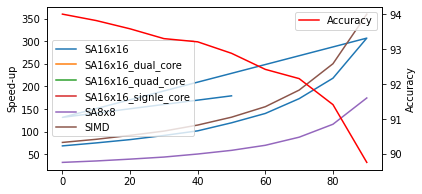

In [7]:
mean_exec_time_df = execution_time_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity'])['execution_time'].mean().reset_index(name='execution_time')
mean_exec_time_df['speed-up'] = 125.0/mean_exec_time_df['execution_time']

grouped = mean_exec_time_df.groupby('architecture')
# Plot the data
fig, ax = plt.subplots(figsize=(6,3))
for name, group in grouped:
    ax.plot(group['sparsity'], group['speed-up'], label=name)
ax.set_ylabel('Speed-up')
# Additional code for accuracy line
accuracy = [94, 93.816, 93.58, 93.3, 93.208, 92.88, 92.42, 92.156, 91.412, 89.76]  # Example accuracy values
ax2 = ax.twinx()  # Create secondary y-axis
ax2.plot(range(0, 100, 10), accuracy, 'r', label='Accuracy')  # Plot the accuracy line
ax2.set_ylabel('Accuracy')  # Set label for secondary y-axis

ax.legend(loc='center left')
ax2.legend(loc='upper right')  # Add legend for accuracy line

plt.savefig('output/block_pruned_accelerators.png', bbox_inches='tight', dpi=300)

## BWMA vs. RWMA

In [8]:
condition = (df['sparsity'] == 0) & (df['transformer_model'] == 'Bert-base')
block_wise_row_wise_df = df[condition]

execution_time_df = block_wise_row_wise_df.groupby(
    ['transformer_model', 'acceleration_method', 'architecture', 'iteration'])[
    'sim_seconds'].sum().reset_index(name='execution_time')
execution_time_df


,transformer_model,acceleration_method,architecture,iteration,execution_time
0,Bert-base,BWMA,SA16x16,0,0.785289
1,Bert-base,BWMA,SA16x16,1,0.788901
2,Bert-base,BWMA,SA16x16,2,0.789966
3,Bert-base,BWMA,SA16x16,3,0.790312
4,Bert-base,BWMA,SA16x16,4,0.789538
5,Bert-base,BWMA,SA16x16_dual_core,0,0.434994
6,Bert-base,BWMA,SA16x16_quad_core,0,0.256660
7,Bert-base,BWMA,SA16x16_signle_core,0,0.802852
8,Bert-base,BWMA,SA8x8,0,1.454182
9,Bert-base,BWMA,SA8x8,1,1.454485


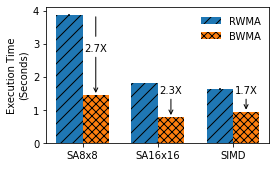

In [9]:
# Grouped data
architectures = ['SA8x8', 'SA16x16', 'SIMD']
acceleration_methods = ['RWMA', 'BWMA']

# Initialize lists for means and standard deviations
means_row_wise = []
stds_row_wise = []
means_block_wise = []
stds_block_wise = []

# Calculate mean and standard deviation for each group
for architecture in architectures:
    group_row_wise = execution_time_df[
        (execution_time_df['architecture'] == architecture) &
        (execution_time_df['acceleration_method'] == 'RWMA')
    ]
    group_block_wise = execution_time_df[
        (execution_time_df['architecture'] == architecture) &
        (execution_time_df['acceleration_method'] == 'BWMA')
    ]
    means_row_wise.append(group_row_wise['execution_time'].mean())
    stds_row_wise.append(group_row_wise['execution_time'].std())
    means_block_wise.append(group_block_wise['execution_time'].mean())
    stds_block_wise.append(group_block_wise['execution_time'].std())

# Plotting
x = np.arange(len(architectures))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(4,2.5))
rects1 = ax.bar(x - bar_width/2, means_row_wise, bar_width, label='RWMA', hatch='//')
rects2 = ax.bar(x + bar_width/2, means_block_wise, bar_width, label='BWMA', hatch='XXX')

# Add error bars
ax.errorbar(x - bar_width/2, means_row_wise, yerr=stds_row_wise, fmt='none', color='black', capsize=0)
ax.errorbar(x + bar_width/2, means_block_wise, yerr=stds_block_wise, fmt='none', color='black', capsize=0)


# Add arrows indicating percentage difference
for i, (rect1, rect2) in enumerate(zip(rects1, rects2)):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    percentage_diff = height1 / height2

    # Determine the vertical direction of the arrow
    va = 'bottom' if percentage_diff >= 0 else 'top'

    ax.annotate(f'{percentage_diff:.1f}X',
                xy=(rect2.get_x() + rect2.get_width() / 2, height2),
                xytext=(rect2.get_x() + rect2.get_width() / 2, (height1 + height2)/2 + 0.05 if i==0 else 1.45),
                textcoords="data",
                ha='center', va=va,
                arrowprops=dict(arrowstyle="->"))
    if i==0:
        ax.annotate('',
                    xy=(rect2.get_x() + rect2.get_width() / 2, height1),
                    xytext=(rect2.get_x() + rect2.get_width() / 2, (height1 + height2)/2 + 0.5),
                    textcoords="data",
                    ha='center', va=va,
                    arrowprops=dict(arrowstyle="-"))



# Add labels, titles, and legends
# ax.set_xlabel('Architecture')
ax.set_ylabel('Execution Time\n(Seconds)')
# ax.set_title('Execution Time by Architecture and Acceleration Method')
ax.set_xticks(x)
ax.set_xticklabels(['{}\n '.format(arch) for arch in architectures])
legend = ax.legend(frameon=False)
# legend.get_frame().set_facecolor('none')

plt.savefig('./output/bw_vs_rw', dpi=300, bbox_inches='tight',)

In [10]:
df_multi = df[df['architecture'].apply(lambda x: 'core' in x)]
df_multi.groupby('model')['sim_seconds'].sum()

model
Bert-base BWMA SA16x16_dual_core S0 N0      0.434994
Bert-base BWMA SA16x16_quad_core S0 N0      0.256660
Bert-base BWMA SA16x16_signle_core S0 N0    0.802852
Bert-base RWMA SA16x16_dual_core S0 N0      0.967212
Bert-base RWMA SA16x16_quad_core S0 N0      0.527831
Bert-base RWMA SA16x16_signle_core S0 N0    1.873003
Name: sim_seconds, dtype: float64

In [11]:
means_row_wise_multi = [1.873003, 0.9672, 0.527831]
means_block_wise_multi = [0.802852, 0.434992, 0.256660]

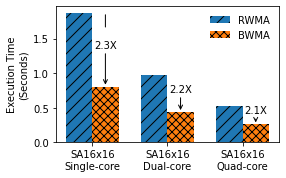

In [12]:
architectures_multi = ['SA16x16\nSingle-core', 'SA16x16\nDual-core', 'SA16x16\nQuad-core']
# Plotting
x = np.arange(len(architectures_multi))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(4,2.5))
rects1 = ax.bar(x - bar_width/2, means_row_wise_multi, bar_width, label='RWMA', hatch='//')
rects2 = ax.bar(x + bar_width/2, means_block_wise_multi, bar_width, label='BWMA', hatch='XXX')

# Add error bars
# ax.errorbar(x - bar_width/2, means_row_wise, yerr=stds_row_wise, fmt='none', color='black', capsize=0)
# ax.errorbar(x + bar_width/2, means_block_wise, yerr=stds_block_wise, fmt='none', color='black', capsize=0)


# Add arrows indicating percentage difference
for i, (rect1, rect2) in enumerate(zip(rects1, rects2)):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    percentage_diff = height1 / height2

    # Determine the vertical direction of the arrow
    va = 'bottom' if percentage_diff >= 0 else 'top'

    ax.annotate(f'{percentage_diff:.1f}X',
                xy=(rect2.get_x() + rect2.get_width() / 2, height2),
                xytext=(rect2.get_x() + rect2.get_width() / 2, (height1 + height2)/2),
                textcoords="data",
                ha='center', va=va,
                arrowprops=dict(arrowstyle="->"))
    if i==0:
        ax.annotate('',
                    xy=(rect2.get_x() + rect2.get_width() / 2, height1),
                    xytext=(rect2.get_x() + rect2.get_width() / 2, (height1 + height2)/2 + 0.3),
                    textcoords="data",
                    ha='center', va=va,
                    arrowprops=dict(arrowstyle="-"))



# Add labels, titles, and legends
# ax.set_xlabel('Architecture')
ax.set_ylabel('Execution Time\n(Seconds)')
# ax.set_title('Execution Time by Architecture and Acceleration Method')
ax.set_xticks(x)
ax.set_xticklabels(architectures_multi)
legend = ax.legend(frameon=False)
# legend.get_frame().set_facecolor('none')

plt.savefig('./output/bw_vs_rw_multi', dpi=300, bbox_inches='tight',)

## All-block-wise

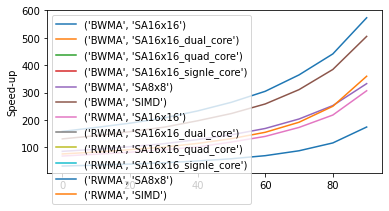

In [13]:
condition = (df['acceleration_method'].isin(['RWMA', 'BWMA'])) & (df['transformer_model'] == 'Bert-base')
abw_df = df[condition]

execution_time_df = abw_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity', 'iteration'])['sim_seconds'].sum().reset_index(name='execution_time')

mean_exec_time_df = execution_time_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity'])['execution_time'].mean().reset_index(name='execution_time')
mean_exec_time_df['speed-up'] = 125.0/mean_exec_time_df['execution_time']

grouped = mean_exec_time_df.groupby(['acceleration_method', 'architecture'])
# Plot the data
fig, ax = plt.subplots(figsize=(6,3))
for name, group in grouped:
    ax.plot(group['sparsity'], group['speed-up'], label=name)
ax.set_ylabel('Speed-up')
ax.legend(loc='upper left')
plt.savefig('output/BWMA.png', bbox_inches='tight', dpi=300)


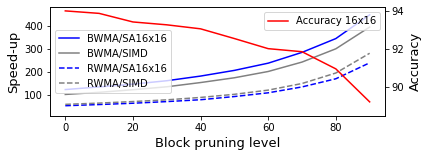

In [14]:
import matplotlib.pyplot as plt

block_size = 16
# condition = (df['acceleration_method'].isin(['RWMA', 'BWMA'])) & (df['transformer_model'] == 'Bert-base') &(df['architecture'].isin(['SA8x8']))
condition = (df['acceleration_method'].isin(['RWMA', 'BWMA'])) & (df['transformer_model'] == 'Bert-base') &(df['architecture'].isin(['SA16x16', 'SIMD'] if block_size==16 else ['SA8x8']))
abw_df = df[condition]

execution_time_df = abw_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity', 'iteration'])['sim_seconds'].sum().reset_index(name='execution_time')

mean_exec_time_df = execution_time_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity'])['execution_time'].mean().reset_index(name='execution_time')
mean_exec_time_df['speed-up'] = 97.41 / mean_exec_time_df['execution_time']

grouped = mean_exec_time_df.groupby(['acceleration_method', 'architecture'])

# Define colors for each architecture
architecture_colors = {'SA16x16': 'blue', 'SA8x8': 'green', 'SIMD': 'gray'}

# Plot the data
fig, ax = plt.subplots(figsize=(6, 2))
for name, group in grouped:
    architecture = name[1]
    linestyle = '--' if name[0] == 'RWMA' else '-'
    color = architecture_colors.get(architecture, 'black')
    plot_name = name[0]
    plot_name += '/{}'.format(name[1])
    ax.plot(group['sparsity'], group['speed-up'], linestyle=linestyle, color=color, label=plot_name)

ax.set_ylabel('Speed-up', fontsize=13)
ax.set_xlabel('Block pruning level', fontsize=13)
ax.set_ylim([10, 480])
accuracy16 = [94, 93.87, 93.42, 93.27, 93.06, 92.55, 92.02, 91.86, 90.96, 89.23]  # Example accuracy values
accuracy8 = [94, 93.82, 93.57, 93.4, 92.93, 92.82, 92.24, 91.6, 90.85, 88.58]  # Example accuracy values

ax2 = ax.twinx()  # Create secondary y-axis
ax2.plot(range(0, 100, 10), accuracy16 if block_size==16 else accuracy8, 'r', label='Accuracy {}x{}'.format(block_size, block_size))  # Plot the accuracy line
ax2.set_ylabel('Accuracy', fontsize=13)  # Set label for secondary y-axis
ax2.set_ylim([88.5, 94.2])
ax.legend(loc='center left')
ax2.legend(loc='upper right')  # Add legend for accuracy line


plt.savefig('./output/Block-wise{}.png'.format(block_size), bbox_inches='tight', dpi=300)


In [15]:
speedup_sparsity_df = mean_exec_time_df[mean_exec_time_df['acceleration_method'] == "BWMA"]
speedup_sparsity_df['speed-up'] = speedup_sparsity_df['speed-up'] / 66.905202
speedup_sparsity_df['speed-up'] = speedup_sparsity_df['speed-up'].apply(lambda x: int(x*100)/100)
speedup_sparsity_df['pruned_blocks (%)'] = speedup_sparsity_df['sparsity']
speedup_sparsity_df[['pruned_blocks (%)', 'speed-up']].to_csv('sparsity.csv')

/tmp/ipykernel_4747/3178827499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speedup_sparsity_df['speed-up'] = speedup_sparsity_df['speed-up'] / 66.905202
/tmp/ipykernel_4747/3178827499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speedup_sparsity_df['speed-up'] = speedup_sparsity_df['speed-up'].apply(lambda x: int(x*100)/100)
/tmp/ipykernel_4747/3178827499.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [16]:
abw_df = abw_df.groupby('model').aggregate('sum', numeric_only=True).reset_index()
abw_df['transformer_model'] = abw_df['model'].apply(lambda x: x.split(' ')[0])
abw_df['acceleration_method'] = abw_df['model'].apply(lambda x: x.split(' ')[1])
abw_df['architecture'] = abw_df['model'].apply(lambda x: x.split(' ')[2])
abw_df['sparsity'] = abw_df['model'].apply(lambda x: int(x.split(' ')[3][1:]))
abw_df['iteration'] = abw_df['model'].apply(lambda x: int(x.split(' ')[4][1:]))

abw_df['system.mem_ctrls.overall_accesses::total'] = abw_df['system.mem_ctrls.num_reads::total'] + abw_df['system.mem_ctrls.num_writes::total']

abw_df[abw_df['architecture'] == 'SA16x16']

,model,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.dcache.overall_hits::total,system.cpu.dcache.overall_misses::total,system.cpu.dcache.overall_miss_latency::total,system.cpu.dcache.overall_accesses::total,system.cpu.dcache.overall_miss_rate::total,...,system.cpu3.dcache.overall_misses::total,system.cpu3.dcache.overall_accesses::total,system.cpu3.icache.overall_misses::total,system.cpu3.icache.overall_accesses::total,sparsity,iteration,transformer_model,acceleration_method,architecture,system.mem_ctrls.overall_accesses::total
0,Bert-base BWMA SA16x16 S0 N0,0.785289,7.852895e+11,1569012.0,163402.0,912683523.0,863976.0,1.694838e+10,913547499.0,0.002117,...,0.0,0.0,0.0,0.0,0,0,Bert-base,BWMA,SA16x16,1732414.0
1,Bert-base BWMA SA16x16 S0 N1,0.788901,7.889008e+11,1887758.0,162013.0,912623654.0,883385.0,2.086640e+10,913507039.0,0.002167,...,0.0,0.0,0.0,0.0,0,1,Bert-base,BWMA,SA16x16,2049771.0
2,Bert-base BWMA SA16x16 S0 N2,0.789966,7.899656e+11,1715904.0,174086.0,912627391.0,890424.0,2.088345e+10,913517815.0,0.002184,...,0.0,0.0,0.0,0.0,0,2,Bert-base,BWMA,SA16x16,1889990.0
3,Bert-base BWMA SA16x16 S0 N3,0.790312,7.903122e+11,1938770.0,165222.0,912603805.0,908878.0,2.229575e+10,913512683.0,0.002214,...,0.0,0.0,0.0,0.0,0,3,Bert-base,BWMA,SA16x16,2103992.0
4,Bert-base BWMA SA16x16 S0 N4,0.789538,7.895381e+11,1722922.0,163895.0,912597439.0,908114.0,2.063418e+10,913505553.0,0.002216,...,0.0,0.0,0.0,0.0,0,4,Bert-base,BWMA,SA16x16,1886817.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Bert-base RWMA SA16x16 S90 N0,0.406632,4.066325e+11,698912.0,400219.0,202765398.0,2008708.0,4.625943e+10,204774106.0,0.025940,...,0.0,0.0,0.0,0.0,90,0,Bert-base,RWMA,SA16x16,1099131.0
126,Bert-base RWMA SA16x16 S90 N1,0.406930,4.069295e+11,707729.0,400297.0,202740106.0,2023369.0,4.668311e+10,204763475.0,0.026043,...,0.0,0.0,0.0,0.0,90,1,Bert-base,RWMA,SA16x16,1108026.0
127,Bert-base RWMA SA16x16 S90 N2,0.408590,4.085902e+11,742991.0,404050.0,202719027.0,2048302.0,4.835421e+10,204767329.0,0.026231,...,0.0,0.0,0.0,0.0,90,2,Bert-base,RWMA,SA16x16,1147041.0
128,Bert-base RWMA SA16x16 S90 N3,0.406243,4.062435e+11,699639.0,402823.0,202748500.0,2010443.0,4.606047e+10,204758943.0,0.025966,...,0.0,0.0,0.0,0.0,90,3,Bert-base,RWMA,SA16x16,1102462.0


In [17]:
column_mapping = {
    'system.cpu.dcache.overall_accesses::total' : 'D-cache accesses',
    'system.cpu.icache.overall_accesses::total' : 'I-cache accesses',
    'system.cpu.dcache.overall_misses::total'   : 'D-cache misses',
    'system.cpu.icache.overall_misses::total'   : 'I-cache misses',
     'system.l2.overall_accesses::total'        : 'L2 accesses',
    'system.l2.overall_misses::total':          'L2 misses',
    # 'system.mem_ctrls.num_reads::total': 'Memory reads',
    # 'system.mem_ctrls.num_writes::total': 'Memory writes',
    # 'system.mem_ctrls.overall_accesses::total'  : 'Main memory accesses',
    # Add more mappings as needed
}

# Rename the columns using the dictionary
abw_df = abw_df.rename(columns=column_mapping)

columns = [
    'D-cache accesses',
'I-cache accesses',
'D-cache misses',
'I-cache misses',
'L2 accesses',
'L2 misses',
# 'Main memory accesses',
               ]

/tmp/ipykernel_4747/1124342683.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_values = filtered_df.groupby(['acceleration_method']).mean().reset_index()
/tmp/ipykernel_4747/1124342683.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_values = filtered_df.groupby(['acceleration_method']).std().reset_index()
/tmp/ipykernel_4747/1124342683.py:55: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks(yticks, yticklabels)


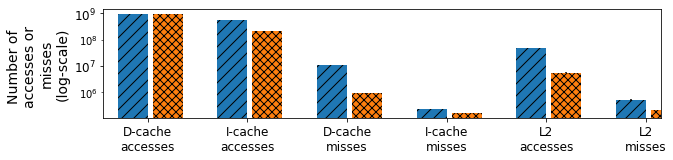

In [19]:
import matplotlib.pyplot as plt

# Filter the rows based on the specified conditions
condition = (abw_df['sparsity'] == 0) & (abw_df['architecture'] == 'SA16x16') & (abw_df['transformer_model'] == 'Bert-base')
filtered_df = abw_df[condition]

# Calculate the average values based on 'iteration'
avg_values = filtered_df.groupby(['acceleration_method']).mean().reset_index()
std_values = filtered_df.groupby(['acceleration_method']).std().reset_index()


# Get the values for 'RWMA' and 'BWMA' acceleration methods
row_wise_values = avg_values[avg_values['acceleration_method'] == 'RWMA']
block_wise_values = avg_values[avg_values['acceleration_method'] == 'BWMA']
row_wise_std = std_values[std_values['acceleration_method'] == 'RWMA']
block_wise_std = std_values[std_values['acceleration_method'] == 'BWMA']


# Plot the data
fig, ax = plt.subplots(figsize=(10, 2))

# Set the bar width and positions
bar_width = 0.3
bar_positions = range(1)


# Set color and hatch patterns for 'RWMA' and 'BWMA'
row_wise_color = 'tab:blue'
block_wise_color = 'tab:orange'
row_wise_hatch = '//'
block_wise_hatch = 'xxx'

# Plot the bars for each column in column_names
for i, column_name in enumerate(columns):
    # Plot the bars for 'RWMA' acceleration method
    ax.bar([pos + i for pos in bar_positions], row_wise_values[column_name], yerr=row_wise_std[column_name], capsize=0, width=bar_width, label='RWMA' if i == 0 else '', color=row_wise_color, hatch=row_wise_hatch)

    # Plot the bars for 'BWMA' acceleration method
    ax.bar([pos + i + 0.35 for pos in bar_positions], block_wise_values[column_name], width=bar_width,  yerr=block_wise_std[column_name], capsize=0, label='BWMA' if i == 0 else '', color=block_wise_color, hatch=block_wise_hatch)

# Set the x-axis labels based on 'iteration'
ax.set_xticks([pos + bar_width / 2 for pos in range(len(columns))])
# ax.set_xticks([pos for pos in range(len(columns))])
ax.set_xticklabels([x.replace(" ", "\n") for x in columns], rotation=0, fontsize=14)

# Set the y-axis label
ax.set_ylabel('Number of \naccesses or \nmisses\n(log-scale)', fontsize=14)

ax.set_yscale('log')
ax.set_xlim([-0.3,5.3])

# Manually set the y-axis tick locations and labels
yticks = [10**6, 10**7, 10**8, 10**9]
yticklabels = ['10^6', '10^7', '10^8', '10^9']
ax.set_yticks(yticks, yticklabels)

# Increase font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# ax.legend(fontsize=12, loc='upper right')

plt.savefig('./output/SA16_RWMA_mem.png', bbox_inches='tight', dpi=300)

In [51]:
#divide the following values by each other
row_wise_values['L2 accesses'], block_wise_values['L2 accesses']

(1    48667443.0
 Name: L2 accesses, dtype: float64,
 0    5363983.0
 Name: L2 accesses, dtype: float64)

## Multi core

In [38]:
condition = (df['acceleration_method'].isin(['RWMA', 'BWMA'])) & (df['transformer_model'] == 'Bert-base') &(df['architecture'].isin(['SA16x16_quad_core']))
abw_df = df[condition]
abw_df = abw_df.groupby('model').aggregate('sum', numeric_only=True).reset_index()
abw_df['transformer_model'] = abw_df['model'].apply(lambda x: x.split(' ')[0])
abw_df['acceleration_method'] = abw_df['model'].apply(lambda x: x.split(' ')[1])
abw_df['architecture'] = abw_df['model'].apply(lambda x: x.split(' ')[2])
abw_df['sparsity'] = abw_df['model'].apply(lambda x: int(x.split(' ')[3][1:]))
abw_df['iteration'] = abw_df['model'].apply(lambda x: int(x.split(' ')[4][1:]))

abw_df['system.mem_ctrls.overall_accesses::total'] = abw_df['system.mem_ctrls.num_reads::total'] + abw_df['system.mem_ctrls.num_writes::total']

# abw_df['sim_seconds'] *= 2.3

column_mapping = {
    'system.cpu0.dcache.overall_accesses::total': 'D-cache accesses Core#1',
    'system.cpu1.dcache.overall_accesses::total': 'D-cache accesses Core#2',
    'system.cpu2.dcache.overall_accesses::total': 'D-cache accesses Core#3',
    'system.cpu3.dcache.overall_accesses::total': 'D-cache accesses Core#4',
    'system.cpu0.icache.overall_accesses::total': 'I-cache accesses Core#1',
    'system.cpu1.icache.overall_accesses::total': 'I-cache accesses Core#2',
    'system.cpu2.icache.overall_accesses::total': 'I-cache accesses Core#3',
    'system.cpu3.icache.overall_accesses::total': 'I-cache accesses Core#4',
    'system.cpu0.dcache.overall_misses::total':  'D-cache misses Core#1',
    'system.cpu1.dcache.overall_misses::total':  'D-cache misses Core#2',
    'system.cpu2.dcache.overall_misses::total':  'D-cache misses Core#3',
    'system.cpu3.dcache.overall_misses::total':  'D-cache misses Core#4',
    'system.cpu0.icache.overall_misses::total':  'I-cache misses Core#1',
    'system.cpu1.icache.overall_misses::total':  'I-cache misses Core#2',
    'system.cpu2.icache.overall_misses::total':  'I-cache misses Core#3',
    'system.cpu3.icache.overall_misses::total':  'I-cache misses Core#4',
    'system.l2.overall_accesses::total': 'L2 accesses',
    'system.l2.overall_misses::total': 'L2 misses',
    # 'system.mem_ctrls.overall_accesses::total': 'Main memory accesses',
    # Add more mappings as needed
}

# Rename the columns using the dictionary
abw_df = abw_df.rename(columns=column_mapping)

columns = [
     'D-cache accesses Core#1',
 'D-cache accesses Core#2',
 'D-cache accesses Core#3',
 'D-cache accesses Core#4',
 'I-cache accesses Core#1',
 'I-cache accesses Core#2',
 'I-cache accesses Core#3',
 'I-cache accesses Core#4',
'D-cache misses Core#1',
'D-cache misses Core#2',
'D-cache misses Core#3',
'D-cache misses Core#4',
'I-cache misses Core#1',
'I-cache misses Core#2',
'I-cache misses Core#3',
'I-cache misses Core#4',
    'L2 accesses',
    'L2 misses',
    # 'Main memory accesses',
]

abw_df


,model,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.dcache.overall_hits::total,system.cpu.dcache.overall_misses::total,system.cpu.dcache.overall_miss_latency::total,system.cpu.dcache.overall_accesses::total,system.cpu.dcache.overall_miss_rate::total,...,D-cache misses Core#4,D-cache accesses Core#4,I-cache misses Core#4,I-cache accesses Core#4,sparsity,iteration,transformer_model,acceleration_method,architecture,system.mem_ctrls.overall_accesses::total
0,Bert-base BWMA SA16x16_quad_core S0 N0,0.256660,2.566597e+11,744602.0,178159.0,0.0,0.0,0.0,0.0,0.0,...,89652.0,233322534.0,50738.0,59702963.0,0,0,Bert-base,BWMA,SA16x16_quad_core,922761.0
1,Bert-base RWMA SA16x16_quad_core S0 N0,0.527831,5.278308e+11,672822.0,266212.0,0.0,0.0,0.0,0.0,0.0,...,2729463.0,247977195.0,79321.0,141155874.0,0,0,Bert-base,RWMA,SA16x16_quad_core,939034.0


In [39]:

# Calculate the average values based on 'iteration'
avg_values = abw_df.groupby(['acceleration_method']).mean().reset_index()
std_values = abw_df.groupby(['acceleration_method']).std().reset_index()


# Get the values for 'RWMA' and 'BWMA' acceleration methods
row_wise_values = avg_values[avg_values['acceleration_method'] == 'RWMA']
block_wise_values = avg_values[avg_values['acceleration_method'] == 'BWMA']

row_wise_values

/tmp/ipykernel_4747/744540755.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_values = abw_df.groupby(['acceleration_method']).mean().reset_index()
/tmp/ipykernel_4747/744540755.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_values = abw_df.groupby(['acceleration_method']).std().reset_index()


,acceleration_method,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.dcache.overall_hits::total,system.cpu.dcache.overall_misses::total,system.cpu.dcache.overall_miss_latency::total,system.cpu.dcache.overall_accesses::total,system.cpu.dcache.overall_miss_rate::total,...,D-cache accesses Core#3,I-cache misses Core#3,I-cache accesses Core#3,D-cache misses Core#4,D-cache accesses Core#4,I-cache misses Core#4,I-cache accesses Core#4,sparsity,iteration,system.mem_ctrls.overall_accesses::total
1,RWMA,0.527831,5.278308e+11,672822.0,266212.0,0.0,0.0,0.0,0.0,0.0,...,271020553.0,103964.0,162084548.0,2729463.0,247977195.0,79321.0,141155874.0,0.0,0.0,939034.0


/tmp/ipykernel_4990/1765314932.py:56: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks(yticks, yticklabels)


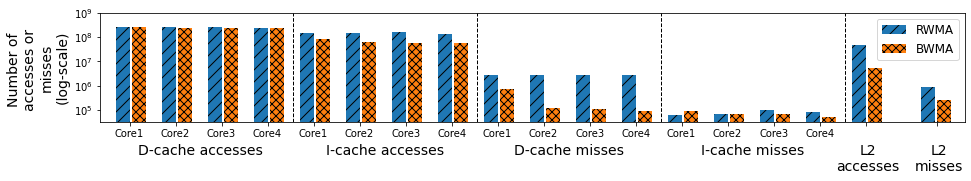

In [60]:

# Plot the data
fig, ax = plt.subplots(figsize=(15.5, 2))

# Set the bar width and positions
bar_width = 0.3
bar_positions = range(1)


# Set color and hatch patterns for 'RWMA' and 'BWMA'
row_wise_color = 'tab:blue'
block_wise_color = 'tab:orange'
row_wise_hatch = '//'
block_wise_hatch = 'xxx'

# Plot the bars for each column in column_names
for i, column_name in enumerate(columns[:-1]):
    # Plot the bars for 'RWMA' acceleration method
    ax.bar([pos + i for pos in bar_positions], row_wise_values[column_name], capsize=0, width=bar_width, label='RWMA' if i == 0 else '', color=row_wise_color, hatch=row_wise_hatch)

    # Plot the bars for 'BWMA' acceleration method
    ax.bar([pos + i + 0.35 for pos in bar_positions], block_wise_values[column_name], width=bar_width,  capsize=0, label='BWMA' if i == 0 else '', color=block_wise_color, hatch=block_wise_hatch)

# The last column show be plotted exactly the same but with a pading of 0.5 on the x axis
i = len(columns) - 1
column_name = columns[-1]
# Plot the bars for 'RWMA' acceleration method
ax.bar([pos + i + 0.5 for pos in bar_positions], row_wise_values[column_name], capsize=0, width=bar_width, label='RWMA' if i == 0 else '', color=row_wise_color, hatch=row_wise_hatch)
# Plot the bars for 'BWMA' acceleration method
ax.bar([pos + i + 0.85 for pos in bar_positions], block_wise_values[column_name], width=bar_width,  capsize=0, label='BWMA' if i == 0 else '', color=block_wise_color, hatch=block_wise_hatch)


# Set the x-axis labels based on 'iteration'
ax.set_xticks([pos + bar_width / 2 for pos in range(len(columns[:-1]))] + [17.7])
# ax.set_xticklabels([x.replace(" ", "\n") for x in columns], rotation=90, fontsize=10)
ax.set_xticklabels([x.split(" ")[-1].replace("#", "") for x in columns if not x.startswith('L2')], fontsize=10)
# I want to put an xtick for the first four bars as a group tick: "D-cache accesses"
# Do not show the small tick on the axis

ax.set_xticks([1.7, 5.7, 9.7, 13.7, 16.2, 17.75], minor=True)
ax.set_xticklabels(['D-cache accesses', 'I-cache accesses', 'D-cache misses', 'I-cache misses', 'L2\naccesses', 'L2\nmisses'], minor=True, fontsize=14)
ax.tick_params(axis='x', which='minor', pad=20, bottom=False)

# add vertical dashed line in positions of [5, 9, 13]
for i in [3.7, 7.7, 11.7, 15.7]:
    ax.axvline(i, color='black', linestyle='--', linewidth=1)

# Set the y-axis label
ax.set_ylabel('Number of \naccesses or \nmisses\n(log-scale)', fontsize=14)

ax.set_yscale('log')
ax.set_xlim([-0.5,18.3])

# Manually set the y-axis tick locations and labels
yticks = [10**6, 10**7, 10**8, 10**9]
yticklabels = ['10^6', '10^7', '10^8', '10^9']
ax.set_yticks(yticks, yticklabels)

# Increase font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=10)

ax.legend(fontsize=12, loc='upper right')

plt.savefig('./output/SA16_BW_mem_quad.png', bbox_inches='tight', dpi=300)

In [52]:
# row_wise_values[['D-cache misses Core#{}'.format(x) for x in range(1,5)]]
# get the average of all columns
# row_wise_values[['D-cache misses Core#{}'.format(x) for x in range(1,5)]].mean(axis=1)
# block_wise_values[['D-cache misses Core#{}'.format(x) for x in range(1,5)]].mean(axis=1)
row_wise_values['L2 accesses'], block_wise_values['L2 accesses']

(1    48667443.0
 Name: L2 accesses, dtype: float64,
 0    5363983.0
 Name: L2 accesses, dtype: float64)

In [89]:
df[df['model'] == 'Bert-base RWMA SA16x16_quad_core S0 N0']
# df

,model,layer,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.dcache.overall_hits::total,system.cpu.dcache.overall_misses::total,system.cpu.dcache.overall_miss_latency::total,system.cpu.dcache.overall_accesses::total,...,system.cpu2.icache.overall_accesses::total,system.cpu3.dcache.overall_misses::total,system.cpu3.dcache.overall_accesses::total,system.cpu3.icache.overall_misses::total,system.cpu3.icache.overall_accesses::total,transformer_model,acceleration_method,architecture,sparsity,iteration
692,Bert-base RWMA SA16x16_quad_core S0 N0,MHA,0.441122,4.411222e+11,275851.0,127218.0,NaN,NaN,NaN,NaN,...,77070880.0,551422.0,102571453.0,67779.0,62292988.0,Bert-base,RWMA,SA16x16_quad_core,0,0
693,Bert-base RWMA SA16x16_quad_core S0 N0,FF,0.728228,7.282278e+11,358194.0,142574.0,NaN,NaN,NaN,NaN,...,82489756.0,2266062.0,148856844.0,50310.0,80577821.0,Bert-base,RWMA,SA16x16_quad_core,0,0


## Acceleration Methods

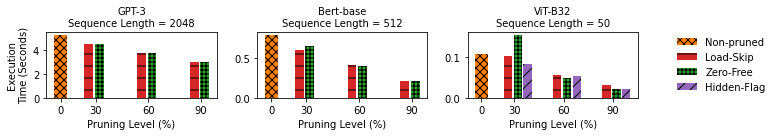

In [31]:
condition = (df['acceleration_method'].isin(['ZF', 'BWMA', 'No-pruning', 'Hidden'])) & (df['architecture'] == 'SA16x16') & (df['sparsity'].isin([0, 30, 60, 90]))
zf_df = df[condition]

execution_time_df = zf_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity', 'iteration'])['sim_seconds'].sum().reset_index(name='execution_time')

mean_exec_time_df = execution_time_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity'])['execution_time'].mean().reset_index(name='execution_time')
#
# mean_exec_time_df = mean_exec_time_df[mean_exec_time_df['transformer_model'] == 'Bert-base']
# Plot the data
grouped = mean_exec_time_df.groupby(['transformer_model'])

# Plot the data
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11, 2))

x = np.arange(6)

method_rename = {"BWMA": "Load-Skip",
                 "ZF": "Zero-Free",
                 "Hidden": "Hidden-Flag"}

# Define color and hatch patterns for 'BWMA' and 'Zero-free'
block_wise_color = 'tab:red'
zero_free_color = 'tab:green'
hidden_flag_color = 'tab:purple'
zero_free_hatch = '+++'
block_wise_hatch = '-'
hidden_flag_hatch = '//'
no_pruning_color = 'tab:orange'
no_pruning_hatch = 'xxx'
method_color_dict = {
    "BWMA": block_wise_color,
    "ZF": zero_free_color,
    "Hidden": hidden_flag_color
}

method_hatch_dict = {
    "BWMA": block_wise_hatch,
    "ZF": zero_free_hatch,
    "Hidden": hidden_flag_hatch
}

# Loop through each transformer_model
for i, model in enumerate(['GPT-3','Bert-base', 'ViT-B32']):
    # Get the corresponding data for the current model
    model_data = mean_exec_time_df[mean_exec_time_df['transformer_model'] == model]

    # Set the subplot for the current model
    ax = axs[i]
    handles = []
    labels = []

    bar = ax.bar(-0.5, model_data[(model_data['sparsity'] == 0) & (model_data['acceleration_method'] == 'No-pruning')]['execution_time'], width=0.15, label='BWMA\nNone', color=no_pruning_color,  hatch=no_pruning_hatch)
    handles.append(bar)
    labels.append('Non-pruned')

    # Loop through each sparsity value
    for j, sparsity in enumerate([30, 60, 90]):
        # Loop through each acceleration method
        for k, method in enumerate(['BWMA', 'ZF', 'Hidden']):
            # Get the corresponding data for the current sparsity and acceleration method
            method_data = model_data[(model_data['sparsity'] == sparsity) & (model_data['acceleration_method'] == method)]

            # Set the x position for the current bar
            curr_x = x[j]*0.6 + (k - 1.5) * 0.12

            # Set color and hatch pattern based on the method
            color = method_color_dict[method]
            hatch = method_hatch_dict[method]

            # Plot the bar
            bar = ax.bar(curr_x, method_data['execution_time'], width=0.1, label=f"{method_rename[method]}", color=color, hatch=hatch)
            handles.append(bar)
            labels.append(f"{method_rename[method]}")


    # Set the x-axis labels and title for each subplot
    ax.set_xticks([-0.5, -0.1, 0.5, 1.1])
    ax.set_xticklabels([0, 30, 60, 90], fontsize=8)  # Increase font size for x-axis labels
    ax.set_xlabel('Pruning Level (%)', fontsize=10)  # Increase font size for x-axis label
    seq_len = 2048 if model=='GPT-3' else (512 if model=='Bert-base' else 50)
    ax.set_title("{}\nSequence Length = {}".format(model, seq_len), fontsize=10)  # Increase font size for subplot title
    if i == 0:
        ax.set_ylabel('Execution\nTime (Seconds)', fontsize=10)  # Increase font size for y-axis label
    if i == 2:
        ax.legend(handles[:4], labels[:4], loc='center right', fontsize=10, bbox_to_anchor=(1.8, 0.5), frameon=False)

# Increase font size for tick labels
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=10)

# Adjust spacing between subplots
fig.tight_layout()

plt.savefig('output/acceleration_methods.png', bbox_inches='tight', dpi=300)

array(['BWMA', 'ZF', 'Hidden', 'No-pruning'], dtype=object)

In [ ]:
# columns = zf_df.columns[4:-5]
zf_df['system.mem_ctrls.overall_accesses::total'] = zf_df['system.mem_ctrls.num_reads::total'] + zf_df['system.mem_ctrls.num_writes::total']

zf_df['system.switch_cpus.op_class_0::CusAluProcessQueue'] = zf_df['system.switch_cpus.op_class_0::CusAluProcess']+ zf_df['system.switch_cpus.op_class_0::CusAluQueue']

column_mapping = {
    'system.cpu.dcache.overall_accesses::total' : 'D-cache accesses',
    'system.cpu.icache.overall_accesses::total' : 'I-cache accesses',
    'system.cpu.dcache.overall_misses::total'   : 'D-cache misses',
    'system.cpu.icache.overall_misses::total'   : 'I-cache misses',
     'system.l2.overall_accesses::total'        : 'L2 accesses',
    'system.mem_ctrls.overall_accesses::total'  : 'Main memory accesses',
    'system.switch_cpus.op_class_0::CusAluProcessQueue': 'SA process',
       'system.switch_cpus.op_class_0::CusAluParamWrite': 'SA load',
}

# Rename the columns using the dictionary
zf_df = zf_df.rename(columns=column_mapping)

columns = [
    'D-cache accesses',
'I-cache accesses',
'D-cache misses',
'I-cache misses',
'L2 accesses',
# 'Main memory accesses',
    # 'SA process',
    # 'SA load'
]


In [ ]:
mean_exec_mem_df

In [ ]:
# Filter the rows based on the specified conditions
condition = (zf_df['sparsity'].isin([30])) & (zf_df['transformer_model'] == 'ViT-B32')
filtered_df = zf_df[condition]

execution_memory_df = filtered_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity', 'iteration']).sum().reset_index()

mean_exec_mem_df = execution_memory_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity']).mean().reset_index()

# Calculate the average values based on 'iteration'
avg_values = mean_exec_mem_df.groupby(['acceleration_method']).mean().reset_index()


# Get the values for 'RWMA' and 'BWMA' acceleration methods
zero_free_values = avg_values[avg_values['acceleration_method'] == 'ZF']
load_skip_values = avg_values[avg_values['acceleration_method'] == 'BWMA']

# Plot the data
fig, ax = plt.subplots(figsize=(4.2, 2))

# Set the bar width and positions
bar_width = 0.2
bar_positions = range(1)


# Set color and hatch patterns for 'RWMA' and 'BWMA'
zero_free_color = 'tab:green'
load_skip_color = 'tab:red'
zero_free_hatch = '+++'
load_skip_hatch = '--'

# Plot the bars for each column in column_names
for i, column_name in enumerate(columns):
    # Plot the bars for 'BWMA' acceleration method
    ax.bar([pos + 0.6*i for pos in bar_positions], load_skip_values[column_name], width=bar_width, capsize=5, label='BWMA, Load-Skip' if i == 0 else '', color=load_skip_color, hatch=load_skip_hatch)

    # Plot the bars for 'RWMA' acceleration method
    ax.bar([pos + 0.6*i + 0.25 for pos in bar_positions], zero_free_values[column_name], capsize=5, width=bar_width, label='BWMA, Zero-Free' if i == 0 else '', color=zero_free_color, hatch=zero_free_hatch)


# Set the x-axis labels based on 'iteration'
ax.set_xticks([0.6*pos + bar_width / 2 for pos in range(len(columns))])
ax.set_xticklabels([x.replace(" ", "\n") for x in columns], rotation=90, fontsize=18)

# Set the y-axis label
ax.set_ylabel('Number of\naccesses or\nmisses\n(log-scale)', fontsize=15)

ax.set_yscale('log')

# Increase font size for tick labels
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=12)

ax.legend(frameon=False, fontsize=12, loc='upper right', bbox_to_anchor=(1.05,1.05))

plt.savefig('output/acceleration_methods_mem_s30.png', bbox_inches='tight', dpi=300)

In [ ]:
avg_values

In [ ]:
zf_df[zf_df['transformer_model'] == 'bert-base']

## MHA, Non-GEMM

In [20]:
MHA_df = df[df['layer'] == ""].copy()
matching_rows = df[(df['layer'] == 'FF') &
                   (df['transformer_model'] == 'Bert-base') &
                   (df['acceleration_method'].isin(['BWMA', 'RWMA'])) &
                   (df['architecture'] == 'SA16x16') &
                   (df['sparsity'].isin([0]))].copy()
MHA_df['head'] = MHA_df['model'].apply(lambda x: int(x.split(' ')[-2][1:]))
MHA_df['component'] = MHA_df['model'].apply(lambda x: x.split(' ')[-1])

matching_rows['head'] = -1
matching_rows['component'] = 'FF'
MHA_df = MHA_df.append(matching_rows, ignore_index=True)
MHA_df

/tmp/ipykernel_19353/676697677.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MHA_df = MHA_df.append(matching_rows, ignore_index=True)


,model,layer,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.dcache.overall_hits::total,system.cpu.dcache.overall_misses::total,system.cpu.dcache.overall_miss_latency::total,system.cpu.dcache.overall_accesses::total,...,system.cpu3.dcache.overall_accesses::total,system.cpu3.icache.overall_misses::total,system.cpu3.icache.overall_accesses::total,transformer_model,acceleration_method,architecture,sparsity,iteration,head,component
0,Bert-base-MHA RWMA SA16x16 S0 N0 H0 QKV,,0.054193,5.419298e+10,143105.0,26923.0,25665017.0,236547.0,1.071388e+10,25901564.0,...,NaN,NaN,NaN,Bert-base-MHA,RWMA,SA16x16,0,0,0,QKV
1,Bert-base-MHA RWMA SA16x16 S0 N0 H0 Transpose,,0.006189,6.188671e+09,39431.0,12579.0,1827028.0,43006.0,2.008657e+09,1870034.0,...,NaN,NaN,NaN,Bert-base-MHA,RWMA,SA16x16,0,0,0,Transpose
2,Bert-base-MHA RWMA SA16x16 S0 N0 H0 QKT,,0.016464,1.646369e+10,61486.0,19986.0,7010784.0,81933.0,3.720238e+09,7092717.0,...,NaN,NaN,NaN,Bert-base-MHA,RWMA,SA16x16,0,0,0,QKT
3,Bert-base-MHA RWMA SA16x16 S0 N0 H0 Softmax,,0.010889,1.088858e+10,52256.0,21185.0,3745400.0,50224.0,2.561849e+09,3795624.0,...,NaN,NaN,NaN,Bert-base-MHA,RWMA,SA16x16,0,0,0,Softmax
4,Bert-base-MHA RWMA SA16x16 S0 N0 H0 QKTV,,0.016374,1.637424e+10,60585.0,16622.0,6984495.0,77317.0,3.685521e+09,7061812.0,...,NaN,NaN,NaN,Bert-base-MHA,RWMA,SA16x16,0,0,0,QKTV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Bert-base RWMA SA16x16 S0 N0,FF,1.210822,1.210822e+12,322503.0,127697.0,538048403.0,8852159.0,1.292286e+11,546900562.0,...,NaN,NaN,NaN,Bert-base,RWMA,SA16x16,0,0,-1,FF
114,Bert-base RWMA SA16x16 S0 N1,FF,1.210658,1.210658e+12,324712.0,128908.0,538045134.0,8855339.0,1.290752e+11,546900473.0,...,NaN,NaN,NaN,Bert-base,RWMA,SA16x16,0,1,-1,FF
115,Bert-base RWMA SA16x16 S0 N2,FF,1.212144,1.212144e+12,333037.0,138005.0,537952644.0,8943965.0,1.305787e+11,546896609.0,...,NaN,NaN,NaN,Bert-base,RWMA,SA16x16,0,2,-1,FF
116,Bert-base RWMA SA16x16 S0 N3,FF,1.211510,1.211510e+12,353714.0,156815.0,538016641.0,8883725.0,1.299286e+11,546900366.0,...,NaN,NaN,NaN,Bert-base,RWMA,SA16x16,0,3,-1,FF


In [21]:
MHA_df.loc[MHA_df['head'] != -1, 'sim_seconds'] *= 12
MHA_df.loc[MHA_df['component'] == 'Add/Norm', 'sim_seconds'] *= 2
MHA_df = MHA_df.groupby(['component', 'acceleration_method', 'sparsity'])['sim_seconds'].median().reset_index(name='sim_seconds')

MHA_df = MHA_df[MHA_df['component'] != 'MHA']


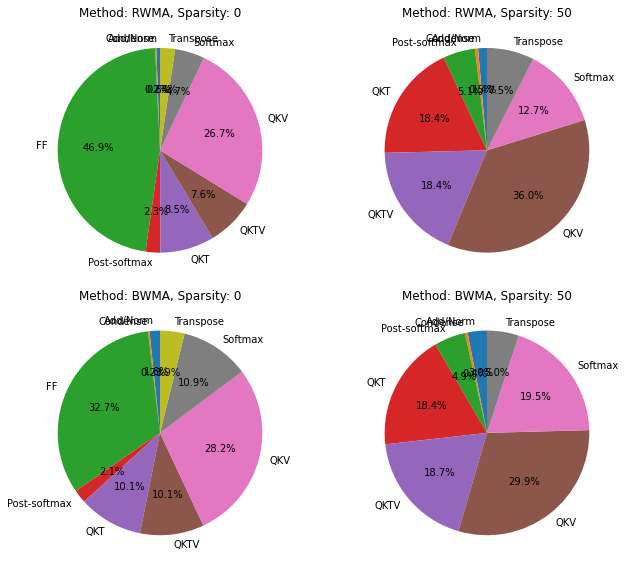

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
combinations = [('RWMA', 0), ('RWMA', 50), ('BWMA', 0), ('BWMA', 50)]

# Iterate over the combinations and plot the pie charts
for i, (acceleration_method, sparsity) in enumerate(combinations):
    # Filter the dataframe based on the current combination
    filtered_df = MHA_df[(MHA_df['acceleration_method'] == acceleration_method) & (MHA_df['sparsity'] == sparsity)]

    # Compute the proportion of 'sim_seconds' based on 'component'
    proportions = filtered_df.groupby('component')['sim_seconds'].sum() / filtered_df['sim_seconds'].sum()

    # Create a pie chart subplot and plot the proportions
    ax = axes[i // 2, i % 2]
    ax.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f"Method: {acceleration_method}, Sparsity: {sparsity}")

# Adjust the layout and spacing between subplots
plt.tight_layout()

In [14]:
new_df = MHA_df.copy()

# Aggregate sim_seconds for 'non-GEMM' component
# non_gem_components = ['Softmax', 'Post-softmax', 'Transpose', 'Add/Norm']
# new_df.loc[new_df['component'].isin(non_gem_components), 'component'] = 'Non-GEMM'

new_df

# Aggregate sim_seconds for 'GEMM Prunable' component
gem_components = ['QKV', 'Condense', 'FF']
new_df.loc[new_df['component'].isin(gem_components), 'component'] = 'GEMM Prunable'

# Aggregate sim_seconds for 'GEMM Prunable' component
gem_nonprunable_components = ['QKT', 'QKTV']
new_df.loc[new_df['component'].isin(gem_nonprunable_components), 'component'] = 'GEMM non-Prunable'
new_df = new_df.groupby(['acceleration_method', 'sparsity', 'component']).agg({'sim_seconds': 'sum'}).reset_index()

new_df

,acceleration_method,sparsity,component,sim_seconds
0,BWMA,0,Add/Norm,0.022472
1,BWMA,0,GEMM Prunable,0.833969
2,BWMA,0,GEMM non-Prunable,0.275910
3,BWMA,0,Post-softmax,0.028560
4,BWMA,0,Softmax,0.149064
5,BWMA,0,Transpose,0.052494
6,BWMA,50,Add/Norm,0.022900
7,BWMA,50,GEMM Prunable,0.228723
8,BWMA,50,GEMM non-Prunable,0.279270
9,BWMA,50,Post-softmax,0.037116


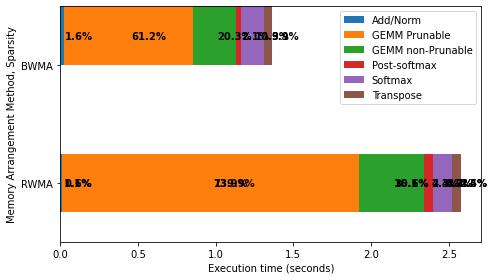

In [15]:
# Assuming your DataFrame is named 'new_df'
# Create a figure
fig, ax = plt.subplots(figsize=(7, 4))

# Define the combinations of 'acceleration_method' and 'sparsity' values
combinations = [('RWMA', 0), ('BWMA', 0)]

# Get the number of combinations
num_combinations = len(combinations)

# Set the height of each bar
bar_height = 0.4

# Calculate the position for each group of bars
y_pos = np.arange(num_combinations)

bars = []
for i, (acceleration_method, sparsity) in enumerate(combinations):
    # Filter the dataframe based on the current combination
    filtered_df = new_df[(new_df['acceleration_method'] == acceleration_method) & (new_df['sparsity'] == sparsity)]

    # Pivot the dataframe to have components as columns and sim_seconds as values
    pivot_df = filtered_df.pivot(index='acceleration_method', columns='component', values='sim_seconds')

    # Calculate the total sim_seconds for each combination
    total_sim_seconds = pivot_df.sum(axis=1).values[0]

    # Calculate the current y position for the group of bars
    current_y_pos = 0.5 - i / bar_height

    # Plot the stacked bar plot
    bar = pivot_df.plot(kind='barh', stacked=True, ax=ax, position=current_y_pos, legend=False)
    bars.append(bar)
    for container in bar.containers:
        # Get the width of each segment
        segment_widths = [rect.get_width() for rect in container]

        # Add the labels to the segments
        for j, rect in enumerate(container):
            proportion = segment_widths[j] / total_sim_seconds
            ax.annotate(f'{proportion:.1%}', xy=(rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height() / 2),
                        xytext=(3, 0), textcoords='offset points', ha='left', va='center',
                        color='black', fontsize=10, fontweight='bold')

# Set the y-axis labels and ticks
ax.set_yticks(y_pos)
ax.set_yticklabels([f"{comb[0]}" for comb in combinations], rotation=0)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel('Execution time (seconds)')
ax.set_ylabel('Memory Arrangement Method, Sparsity')
# ax.set_title('Horizontal Stacked Bar Plot')

# Combine the legends of all the bars into a single legend
handles, labels = bars[0].get_legend_handles_labels()
ax.legend(handles[:6], labels[:6])

# Adjust the layout
plt.tight_layout()

# Show the figure
plt.savefig('./output/gemm_non_gemm.png', bbox_inches='tight', dpi=300)

In [16]:
non_gemm_df = MHA_df[(MHA_df['component'].isin(['Softmax', 'Transpose', 'Add/Norm'])) & (MHA_df['sparsity']==0)]

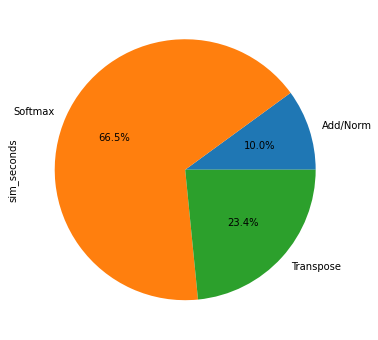

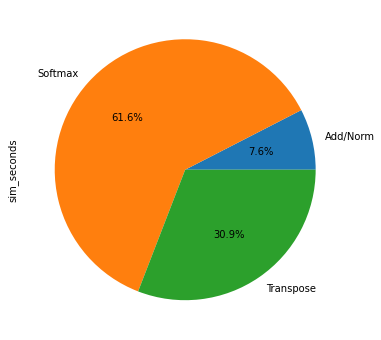

In [17]:
# Assuming your DataFrame is named 'non_gemm_df'
# Filter the DataFrame for 'BWMA' and 'RWMA' acceleration methods
blockwise_df = non_gemm_df[non_gemm_df['acceleration_method'] == 'BWMA']
rowwise_df = non_gemm_df[non_gemm_df['acceleration_method'] == 'RWMA']

# Create the pie chart for 'BWMA' acceleration method
blockwise_pie = blockwise_df.groupby('component')['sim_seconds'].sum()
blockwise_pie_normalized = blockwise_pie / blockwise_pie.sum()
blockwise_pie_normalized.plot.pie(figsize=(6, 6), autopct='%1.1f%%')

# Create the pie chart for 'RWMA' acceleration method
plt.figure()
rowwise_pie = rowwise_df.groupby('component')['sim_seconds'].sum()
rowwise_pie_normalized = rowwise_pie / rowwise_pie.sum()
rowwise_pie_normalized.plot.pie(figsize=(6, 6), autopct='%1.1f%%')
# plt.figure(figsize=(6, 6))
# plt.pie(rowwise_pie, labels=rowwise_pie.index, autopct='%1.1f%%')
# plt.title("RWMA - Component Distribution")
# plt.show()

[0 1 2 3 4 5]
[0.149064 0.121632]
[2 3 4 5 6 7]
[0.022472 0.014914]
[4 5 6 7 8 9]
[0.052494 0.060984]


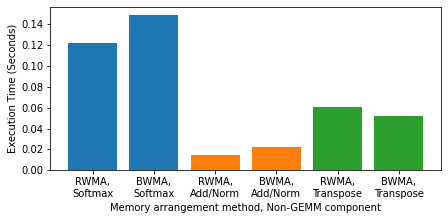

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'non_gemm_df'
# Define the desired order of bars
bar_order = [("RWMA", "Softmax"), ("BWMA", "Softmax"), ("RWMA", "Add/Norm"),
             ("BWMA", "Add/Norm"), ("RWMA", "Transpose"), ("BWMA", "Transpose")]

# Filter the DataFrame for the desired bars
filtered_df = non_gemm_df[(non_gemm_df['acceleration_method'].isin(["RWMA", "BWMA"])) &
                          (non_gemm_df['component'].isin(["Softmax", "Add/Norm", "Transpose"])) &
                          (non_gemm_df['sparsity'] == 0)]

# Create a new column to define the custom bar positions
positions = np.arange(len(bar_order))
filtered_df['position'] = [positions[i // 2] for i in range(filtered_df.shape[0])]

# Pivot the DataFrame to have acceleration_method as columns and components as index
pivot_df = filtered_df.pivot(index='component', columns='acceleration_method', values='sim_seconds')

# Sort the pivot DataFrame based on the desired bar order
pivot_df = pivot_df.reindex(index=[x[1] for x in bar_order[::2]])
# pivot_df

# Create the bar plot
fig, ax = plt.subplots(figsize=(7, 3))
bar_width = 0.2

# Loop through each component
for i, component in enumerate(pivot_df.index):
    # Get the sim_seconds for each acceleration_method
    sim_seconds = pivot_df.loc[component].values

    # Calculate the x positions for the bars based on the position column
    x_pos = positions + i*2
    print(x_pos)
    print(sim_seconds)

    # Plot the bars
    ax.bar(x_pos[:2][::-1], sim_seconds)

# Set the x-axis tick positions and labels
ax.set_xticks(positions)
ax.set_xticklabels([f"{x[0]},\n{x[1]}" for x in bar_order])

# Set the axis labels and title
ax.set_xlabel('Memory arrangement method, Non-GEMM component')
ax.set_ylabel('Execution Time (Seconds)')
# ax.set_title('Sim Seconds by Component and Acceleration Method')

plt.savefig('././output/non_gemm.png', bbox_inches='tight', dpi=300)

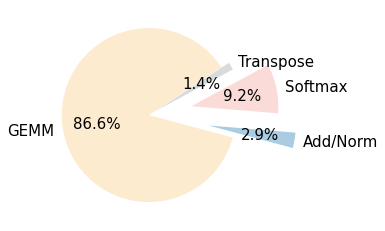

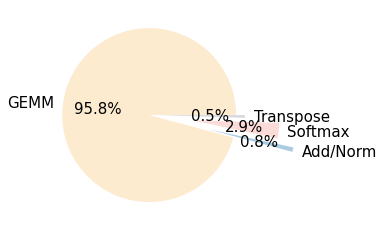

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Experiment': ['RWMA', 'RWMA', 'RWMA', 'RWMA', 'RWMA', 'RWMA',
                   'RWMA', 'RWMA', 'BWMA', 'BWMA', 'BWMA', 'BWMA',
                   'BWMA', 'BWMA', 'BWMA', 'BWMA'],
    'Component': ['QKV', 'QKT', 'Transpose', 'Softmax', 'QKVT', 'Add/Norm', 'Projection', 'FF',
                  'QKV', 'QKT', 'Transpose', 'Softmax', 'QKVT', 'Add/Norm', 'Projection', 'FF'],
    'Execution Time': [0.3603, 0.084327, 0.0092, 0.05198,  0.0837, 0.0149, 0.0053, 1.2047,
                       0.1822, 0.0305, 0.0111, 0.07213, 0.0299, 0.0225, 0.0033, 0.4355]
}


# Create DataFrame
df = pd.DataFrame(data)

# Define component groups
# group_mapping = {
#     'Prunable\nGEMM': ['QKV', 'Projection', 'FF'],
#     'Non-Prunable\nGEMM': ['QKT', 'QKVT']
# }
group_mapping = {
    'GEMM': ['QKV', 'Projection', 'FF', 'QKT', 'QKVT']
}

# Add a new 'Group' column based on the component groups
df['Group'] = df['Component'].map(
    lambda x: next((group for group, components in group_mapping.items() if x in components), x)
)

# Aggregate the execution times by experiment and group
grouped_df = df.groupby(['Experiment', 'Group'])['Execution Time'].sum().reset_index()

# Normalize the execution times within each experiment
grouped_df['Normalized Execution Time'] = grouped_df.groupby('Experiment')['Execution Time'].transform(lambda x: x / x.sum())


# Define the desired order of the groups
# desired_order = ['Add/Norm', 'Softmax', 'Transpose', 'Non-Prunable\nGEMM', 'Prunable\nGEMM', ]
desired_order = ['Add/Norm', 'Softmax', 'Transpose', 'GEMM' ]

# Sort the DataFrame by the desired order
grouped_df['Group'] = pd.Categorical(grouped_df['Group'], categories=desired_order, ordered=True)
grouped_df.sort_values(['Experiment', 'Group'], inplace=True)

# Define light colors for pie chart segments
light_colors = ['#A9CCE3', '#FADBD8', '#D7DBDD', '#FDEBD0', '#F9E79F']


# Plot pie charts for each experiment
for experiment in grouped_df['Experiment'].unique():
    # Filter the grouped DataFrame for the current experiment
    experiment_df = grouped_df[grouped_df['Experiment'] == experiment]

    # Plot pie chart
    plt.figure()
    pie = plt.pie(experiment_df['Normalized Execution Time'], labels=experiment_df['Group'], autopct='%1.1f%%', explode=[0.7,0.5,0.1,0],colors=light_colors, startangle=-15,
                  textprops={'fontsize': 15})

    # Get the index of the Prunable-GEMM group
    prunable_index = experiment_df[experiment_df['Group'] == 'GEMM'].index[0]

    # Add labels for Prunable-GEMM group on top of the corresponding segments
    # for i, label in enumerate(pie[0]):
    #     if i == prunable_index:
    #         angle = (label.theta1 + label.theta2) / 2.0
    #         x = label.r * 1.1 * label.theta2/360 * plt.rcParams['figure.figsize'][0]
    #         y = label.r * 1.1 * label.theta1/360 * plt.rcParams['figure.figsize'][1]
    #         plt.text(x, y, f'{experiment_df["Normalized Execution Time"].iloc[i]:.1%}',
    #                  fontsize=12, ha='center', va='center')


    plt.savefig('./output/{}_pie.png'.format(experiment), dpi=300,  bbox_inches='tight', )



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Experiment': ['RWMA', 'RWMA', 'RWMA', 'RWMA', 'RWMA', 'RWMA',
                   'RWMA', 'RWMA', 'BWMA', 'BWMA', 'BWMA', 'BWMA',
                   'BWMA', 'BWMA', 'BWMA', 'BWMA'],
    'Component': ['QKV', 'QKT', 'Transpose', 'Softmax', 'QKVT', 'Add/Norm', 'Projection', 'FF',
                  'QKV', 'QKT', 'Transpose', 'Softmax', 'QKVT', 'Add/Norm', 'Projection', 'FF'],
    'Execution Time': [0.3603, 0.084327, 0.0092, 0.05198,  0.0837, 0.0149, 0.0053, 1.2047,
                       0.1822, 0.0305, 0.0111, 0.07213, 0.0299, 0.0225, 0.0033, 0.4355]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define component groups
group_mapping = {
    'Prunable\nGEMM': ['QKV', 'Projection', 'FF'],
    'Non-Prunable\nGEMM': ['QKT', 'QKVT']
}

# Add a new 'Group' column based on the component groups
df['Group'] = df['Component'].map(
    lambda x: next((group for group, components in group_mapping.items() if x in components), x)
)

# Aggregate the execution times by experiment and group
grouped_df = df.groupby(['Experiment', 'Group'])['Execution Time'].sum().reset_index()

grouped_df['Normalized Execution Time'] = grouped_df.groupby('Experiment')['Execution Time'].transform(lambda x: x / x.sum())


# Define the desired order of the groups
desired_order = ['Add/Norm', 'Softmax', 'Transpose', 'Non-Prunable\nGEMM', 'Prunable\nGEMM']

# Sort the DataFrame by the desired order
grouped_df['Group'] = pd.Categorical(grouped_df['Group'], categories=desired_order, ordered=True)

grouped_df.sort_values(['Experiment', 'Group'], inplace=True)

# Define light colors for bar segments
light_colors = ['#A9CCE3', '#FADBD8', '#D7DBDD', '#FDEBD0', '#F9E79F']

# Plot stacked horizontal bar charts for each experiment
for experiment in grouped_df['Experiment'].unique():
    # Filter the grouped DataFrame for the current experiment
    experiment_df = grouped_df[grouped_df['Experiment'] == experiment]

    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plot stacked horizontal bar chart
    bars = plt.barh(experiment_df['Group'], experiment_df['Execution Time'], color=light_colors)

    # Set accumulated height
    accumulated_height = 0

    # Add labels and adjust bar widths for the stacked effect
    for bar in bars:
        width = bar.get_width()
        plt.text(accumulated_height + width / 2, bar.get_y() + bar.get_height() / 2,
                 f'{width:.1%}', ha='center', va='center')
        accumulated_height += width
        bar.set_width(accumulated_height)

    # Set y-axis label
    plt.ylabel('Group')

    # Set x-axis label
    plt.xlabel('Normalized Execution Time')

    # Set title
    plt.title(f'Experiment: {experiment}')

    # Adjust layout
    plt.tight_layout()

    # Display the chart
    plt.show()


In [ ]:
# Define the desired order of the groups
desired_order = ['Prunable\nGEMM', 'Non-Prunable\nGEMM', 'Add/Norm', 'Softmax', 'Transpose']

# Sort the DataFrame by the desired order
grouped_df['Group'] = pd.Categorical(grouped_df['Group'], categories=desired_order, ordered=True)

grouped_df.sort_values(['Experiment', 'Group'], inplace=True)

In [ ]:
grouped_df['Execution Time'].tolist()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Experiment': ['BWMA', 'BWMA', 'BWMA', 'BWMA', 'BWMA', 'RWMA', 'RWMA', 'RWMA', 'RWMA', 'RWMA', ],
    'Group': ['Prunable\nGEMM', 'Non-Prunable\nGEMM', 'Add/Norm', 'Softmax', 'Transpose', 'Prunable\nGEMM', 'Non-Prunable\nGEMM', 'Add/Norm', 'Softmax', 'Transpose'],
    # 'Execution Time': grouped_df['Execution Time'].tolist()
    'Execution Time': [0.621,
 0.060399999999999995,
 0.25,
 0.7213,
 0.111,
 1.5703,
 0.16802699999999998,
 0.149,
 0.5198,
 0.0092]
}

# Create DataFrame
group_df = pd.DataFrame(data)

# Get unique groups
groups = group_df['Group'].unique()

# Define colors for each group
colors = ['#A9CCE3', '#FADBD8', '#D7DBDD', '#FDEBD0', '#F9E79F']
# Create figure and axes
fig, axes = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

# Plot stacked bar plot for RWMA
rwma_data = group_df[group_df['Experiment'] == 'RWMA']
rwma_bottom = None
for i, group in enumerate(groups):
    group_data = rwma_data[rwma_data['Group'] == group]
    print(group_data)
    axes[0].barh(group_data['Experiment'], group_data['Execution Time'], left=rwma_bottom, color=colors[i], label=group)
    if rwma_bottom is None:
        rwma_bottom = group_data['Execution Time']
    else:
        rwma_bottom = group_data['Execution Time']

# Set y-axis label for RWMA plot
axes[0].set_ylabel('Experiment (RWMA)')
axes[0].invert_yaxis()

# Plot stacked bar plot for BWMA
bwma_data = group_df[group_df['Experiment'] == 'BWMA']
bwma_bottom = None
for i, group in enumerate(groups):
    group_data = bwma_data[bwma_data['Group'] == group]
    axes[1].barh(group_data['Experiment'], group_data['Execution Time'], left=bwma_bottom, color=colors[i], label=group)
    if bwma_bottom is None:
        bwma_bottom = group_data['Execution Time']
    else:
        bwma_bottom += group_data['Execution Time']

# Set x-axis and y-axis labels for BWMA plot
axes[1].set_xlabel('Execution Time')
axes[1].set_ylabel('Experiment (BWMA)')
axes[1].invert_yaxis()

# Add legend
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.2)

# Show the plot
plt.show()

In [ ]:
# Pivot the data to create a stacked bar plot
pivoted_data = grouped_df.pivot(index='Experiment', columns='Group', values='Execution Time')

# Get unique groups
groups = pivoted_data.columns

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked horizontal bar chart
pivoted_data.plot.barh(stacked=True, color=colors, ax=ax)

# Customize the chart appearance and labels
ax.set_xlabel('Execution Time')
ax.set_ylabel('Experiment')
ax.set_title('Stacked Horizontal Bar Plot of Execution Time by Group')
ax.legend()

# Reverse the y-axis for top-to-bottom orientation
ax.invert_yaxis()

# Show the plot
plt.show()